In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/parsed_logs.csv')
df.head()

,ip,timestamp,method,url,status,bytes,referrer,user_agent,hour,day,weekday,url_length
0,63.143.42.249,2021-11-30 15:08:14+03:00,GET,/,200,18648,http://promjet.ru,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...,15,30,1,1
1,185.103.167.218,2021-11-30 15:10:19+03:00,GET,/jet/company/875.html,404,70695,-,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,15,30,1,21
2,63.143.42.247,2021-11-30 15:10:34+03:00,HEAD,/,200,0,http://promjet.ru,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...,15,30,1,1
3,93.84.69.87,2021-11-30 15:12:47+03:00,GET,/favicon.ico,200,0,-,Mozilla/5.0 (Windows NT 5.1; rv:52.0) Gecko/20...,15,30,1,12
4,93.84.69.87,2021-11-30 15:12:49+03:00,GET,/favicon.ico,200,0,-,Mozilla/5.0 (Windows NT 5.1; rv:52.0) Gecko/20...,15,30,1,12


In [3]:
# Select features for modeling
features = ['hour', 'weekday', 'url_length']
X = df[features]

In [4]:
# Initialize and train Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.01,   # Tune this depending on how rare anomalies are
    random_state=42
)
df['anomaly_score'] = iso_forest.fit_predict(X)

In [5]:
# IsolationForest returns:
# -1 for anomalies
# 1 for normal points
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

# Check how many anomalies were detected
print("Anomalies detected:", df['is_anomaly'].sum())

Anomalies detected: 1376


In [6]:
# Save results
df.to_csv('../data/processed/with_isolation_forest.csv', index=False)

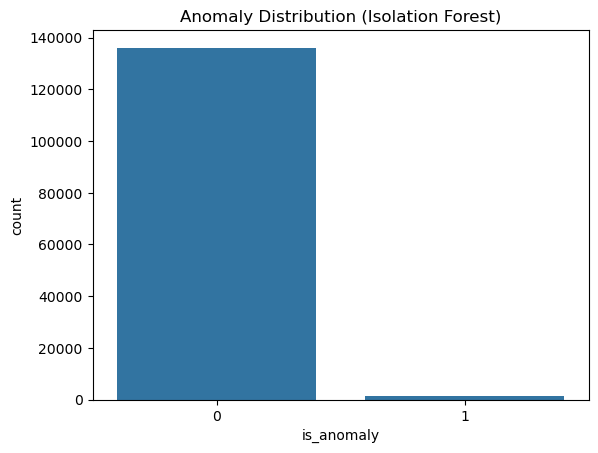

In [7]:
# Optional: Visualize
sns.countplot(x='is_anomaly', data=df)
plt.title("Anomaly Distribution (Isolation Forest)")
plt.show()

In [8]:
# Show top anomalies
df[df['is_anomaly'] == 1][['timestamp', 'url', 'status', 'bytes']]

,timestamp,url,status,bytes
226,2021-11-30 15:58:14+03:00,/shop/medikal_equipment/%D0%BF%D0%BE%D0%B4%D0%...,404,71030
319,2021-11-30 16:26:44+03:00,/wp-content/uploads/2014/08/%D0%9A%D0%BB%D0%B0...,206,3267
320,2021-11-30 16:26:43+03:00,/wp-content/uploads/2014/08/%D0%9A%D0%BB%D0%B0...,206,65536
321,2021-11-30 16:26:41+03:00,/wp-content/uploads/2014/08/%D0%9A%D0%BB%D0%B0...,200,265411
322,2021-11-30 16:26:44+03:00,/wp-content/uploads/2014/08/%D0%9A%D0%BB%D0%B0...,206,65536
...,...,...,...,...
136603,2021-12-31 07:05:35+03:00,/wp-content/uploads/2014/08/%D0%9A%D0%BB%D0%B0...,200,143568
136610,2021-12-31 07:11:26+03:00,/wp-content/uploads/2015/06/6-%D0%A0%D0%B0%D0%...,200,397622
136880,2021-12-31 09:40:16+03:00,/wp-content/uploads/2014/07/%D0%A1%D0%B8%D1%81...,200,77971
137034,2021-12-31 11:10:55+03:00,/wp-content/uploads/2014/08/%D0%AD%D1%82%D0%B8...,200,266089
